# 2. EDA

In [271]:
import io
import os
import json
import pandas as pd
import numpy as np
import random
import distutils.dir_util
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from collections import Counter
import string
from datetime import datetime

fe = fm.FontEntry(
    fname=r'./font/NanumGothic.ttf', name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) 

In [272]:
playlists = pd.read_json('../0_data/playlists.json', typ = 'frame', encoding='utf-8')
song_meta = pd.read_json('../0_data/song_meta.json', typ = 'frame', encoding='utf-8') 
genre_gn_all = pd.read_json('../0_data/genre_gn_all.json', typ = 'frame', encoding='utf-8', orient='index')

## 1) Song Meta & Genre

> Genre

- 대분류 장르, 세부 장르 비교

In [3]:
# genre_gn_all 확인
genre_gn_all.head()

,0
GN0100,발라드
GN0101,세부장르전체
GN0102,'80
GN0103,'90
GN0104,'00


In [4]:
# genre_gn_all의 컬럼 네임 지정

genre_gn_all = genre_gn_all.reset_index().rename(columns={'index':'gnr_code', 0:'gnr_name'})
genre_gn_all.head()

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00


In [5]:
# 대분류 장르코드들만 뽑기
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:]=='00']

# 소분류 장르코드만 뽑기
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] != '00']
dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)

# 대분류 장르코드와 소분류 장르코드 각각의 앞자리 네자리 공통코드 추출
gnr_code = gnr_code.assign(join_code = gnr_code['gnr_code'].str[0:4])
dtl_gnr_code = dtl_gnr_code.assign(join_code = dtl_gnr_code['dtl_gnr_code'].str[0:4])

# join_code(네자리 공통코드) 기준으로 Merge
gnr_code_tree = pd.merge(gnr_code, dtl_gnr_code, how = 'left', on = 'join_code')

gnr_code_tree[['gnr_code', 'gnr_name', 'dtl_gnr_code', 'dtl_gnr_name']]
gnr_code_tree

C:\Users\cg063\AppData\Local\Temp\ipykernel_7992\906477822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)


,gnr_code,gnr_name,join_code,dtl_gnr_code,dtl_gnr_name
0,GN0100,발라드,GN01,GN0101,세부장르전체
1,GN0100,발라드,GN01,GN0102,'80
2,GN0100,발라드,GN01,GN0103,'90
3,GN0100,발라드,GN01,GN0104,'00
4,GN0100,발라드,GN01,GN0105,'10-
...,...,...,...,...,...
220,GN2800,뮤직테라피,GN28,GN2806,반려동물
221,GN2900,뮤지컬,GN29,GN2901,세부장르전체
222,GN2900,뮤지컬,GN29,GN2902,국내뮤지컬
223,GN2900,뮤지컬,GN29,GN2903,국외뮤지컬


In [6]:
# 대분류 장르에는 어떤 소분류 장르가 있는지 확인
gnr_code_tree.groupby('gnr_name')['dtl_gnr_name'].apply(list).reset_index()

,gnr_name,dtl_gnr_name
0,CCM,"[세부장르전체, 국내CCM, 국외CCM, 워십, 찬송가, 성가, 연주곡, 어린이, ..."
1,EDM,"[세부장르전체, 하우스, 클럽, DJ]"
2,J-POP,"[세부장르전체, POP, 록, 일렉트로니카, 랩/힙합, R&B/Soul, 시부야케이..."
3,OST,"[세부장르전체, 국내영화, 국외영화, 국내드라마, 국외드라마, 애니메이션/게임, 국..."
4,POP,"[세부장르전체, 얼터너티브팝, 올디스, 월드팝, '60-'70, '80-'90, '..."
5,R&B/Soul,"[세부장르전체, 어반, R&B, 세부장르전체, 컨템포러리 R&B, 소울, 어반, '..."
6,국악,"[세부장르전체, 크로스오버, 국악가요, 민요, 판소리/단가, 풍물/사물놀이]"
7,뉴에이지,"[세부장르전체, 이지리스닝, J-Newage, 기능성음악, 기타, 피아노, 컴필레이션]"
8,댄스,"[세부장르전체, '80, '90, '00, '10-]"
9,랩/힙합,"[세부장르전체, 랩 스타일, 보컬 스타일, 언더그라운드 힙합, 시대별, 세부장르전체..."


In [64]:
gnr_code_tree['gnr_code'].nunique() # 30개
gnr_code_tree['dtl_gnr_code'].nunique() # 224개

224

In [84]:
# 대분류 코드 중 중복 내용 확인
big_gnr = gnr_code_tree[['gnr_code', 'gnr_name']]
big_gnr = big_gnr.drop_duplicates()
big_gnr.reset_index(inplace=True, drop=True)
big_gnr

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0200,댄스
2,GN0300,랩/힙합
3,GN0400,R&B/Soul
4,GN0500,인디음악
5,GN0600,록/메탈
6,GN0700,성인가요
7,GN0800,포크/블루스
8,GN0900,POP
9,GN1000,록/메탈


In [83]:
# 크리스마스 대분류 코드 소분류 내용 없음
gnr_code_tree[gnr_code_tree['gnr_name'] == '크리스마스']

,gnr_code,gnr_name,join_code,dtl_gnr_code,dtl_gnr_name
224,GN3000,크리스마스,GN30,NaN,NaN


-> 대분류 코드 중 일부 중복 :R&B/Soul(GN0400, GN1300), 록/메탈(GN0600, GN1000)  
-> 대분류 코드 중 크리스마스(GN3000)는 소분류 코드 X

> Song Meta 

- 오류 날짜 확인

C:\Users\cg063\AppData\Local\Temp\ipykernel_7992\1253507143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_issue_date['issue_date'] = song_issue_date['issue_date'].astype(str)
C:\Users\cg063\AppData\Local\Temp\ipykernel_7992\1253507143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_issue_date['issue_year'] = song_issue_date['issue_date'].str[0:4]
C:\Users\cg063\AppData\Local\Temp\ipykernel_7992\1253507143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

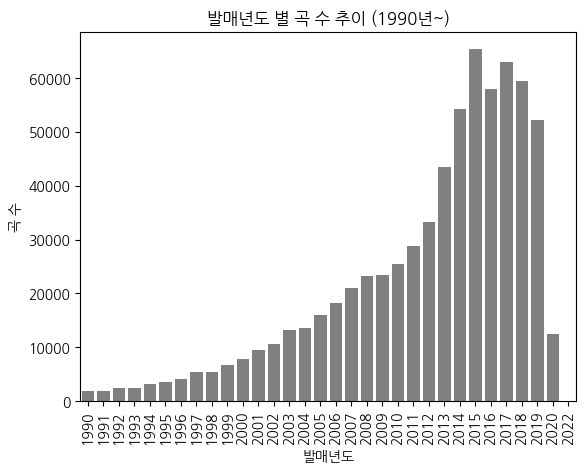

In [7]:
# 1. 곡 아이디(id)와 발매일자(issue_date) 추출
song_issue_date = song_meta[['id', 'issue_date']]
song_issue_date['issue_date'] = song_issue_date['issue_date'].astype(str)

# 2. issue_date의 앞자리 네 자리를 추출하여 발매년도(issue_year) 변수 생성
song_issue_date['issue_year'] = song_issue_date['issue_date'].str[0:4]
song_issue_date.rename(columns = {'id' : 'song_id'}, inplace = True)
song_issue_date['song_id'] = song_issue_date['song_id'].astype(str)

# 3. 1990년도~ 필터링
song_issue_date_filter = song_issue_date[song_issue_date.issue_year >= '1990']

# 4. 발매년도 별 곡 수 count 테이블 생성 : issue_year_song_cnt
issue_year_song_cnt = song_issue_date_filter.groupby('issue_year').song_id.nunique().reset_index(name = 'song_cnt')

# 5. plotting
issue_year_song_cnt_plot = sns.barplot(x = 'issue_year', y = 'song_cnt', data = issue_year_song_cnt, color = 'grey')
issue_year_song_cnt_plot.set_title('발매년도 별 곡 수 추이 (1990년~)')
issue_year_song_cnt_plot.set_xlabel('발매년도')
issue_year_song_cnt_plot.set_ylabel('곡 수')
plt.xticks(rotation = 90)
plt.show()

In [8]:
song_meta[song_meta['issue_date'] > 20200500]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
141185,[GN1801],20220113,고요한 밤바다 구경하기 [여수 바다],10403230,[2737142],잔잔한 바람이 불어와 (There is a gentle breeze),[GN1800],[무드홀릭 (Moodholic)],141185
448286,[GN1801],20220113,고요한 밤바다 구경하기 [여수 바다],10403230,[2737142],여수 바다 (Yeosu sea),[GN1800],[무드홀릭 (Moodholic)],448286


=> 오류 날짜 수정해야 함

- 노래 별 장르 분포 화인

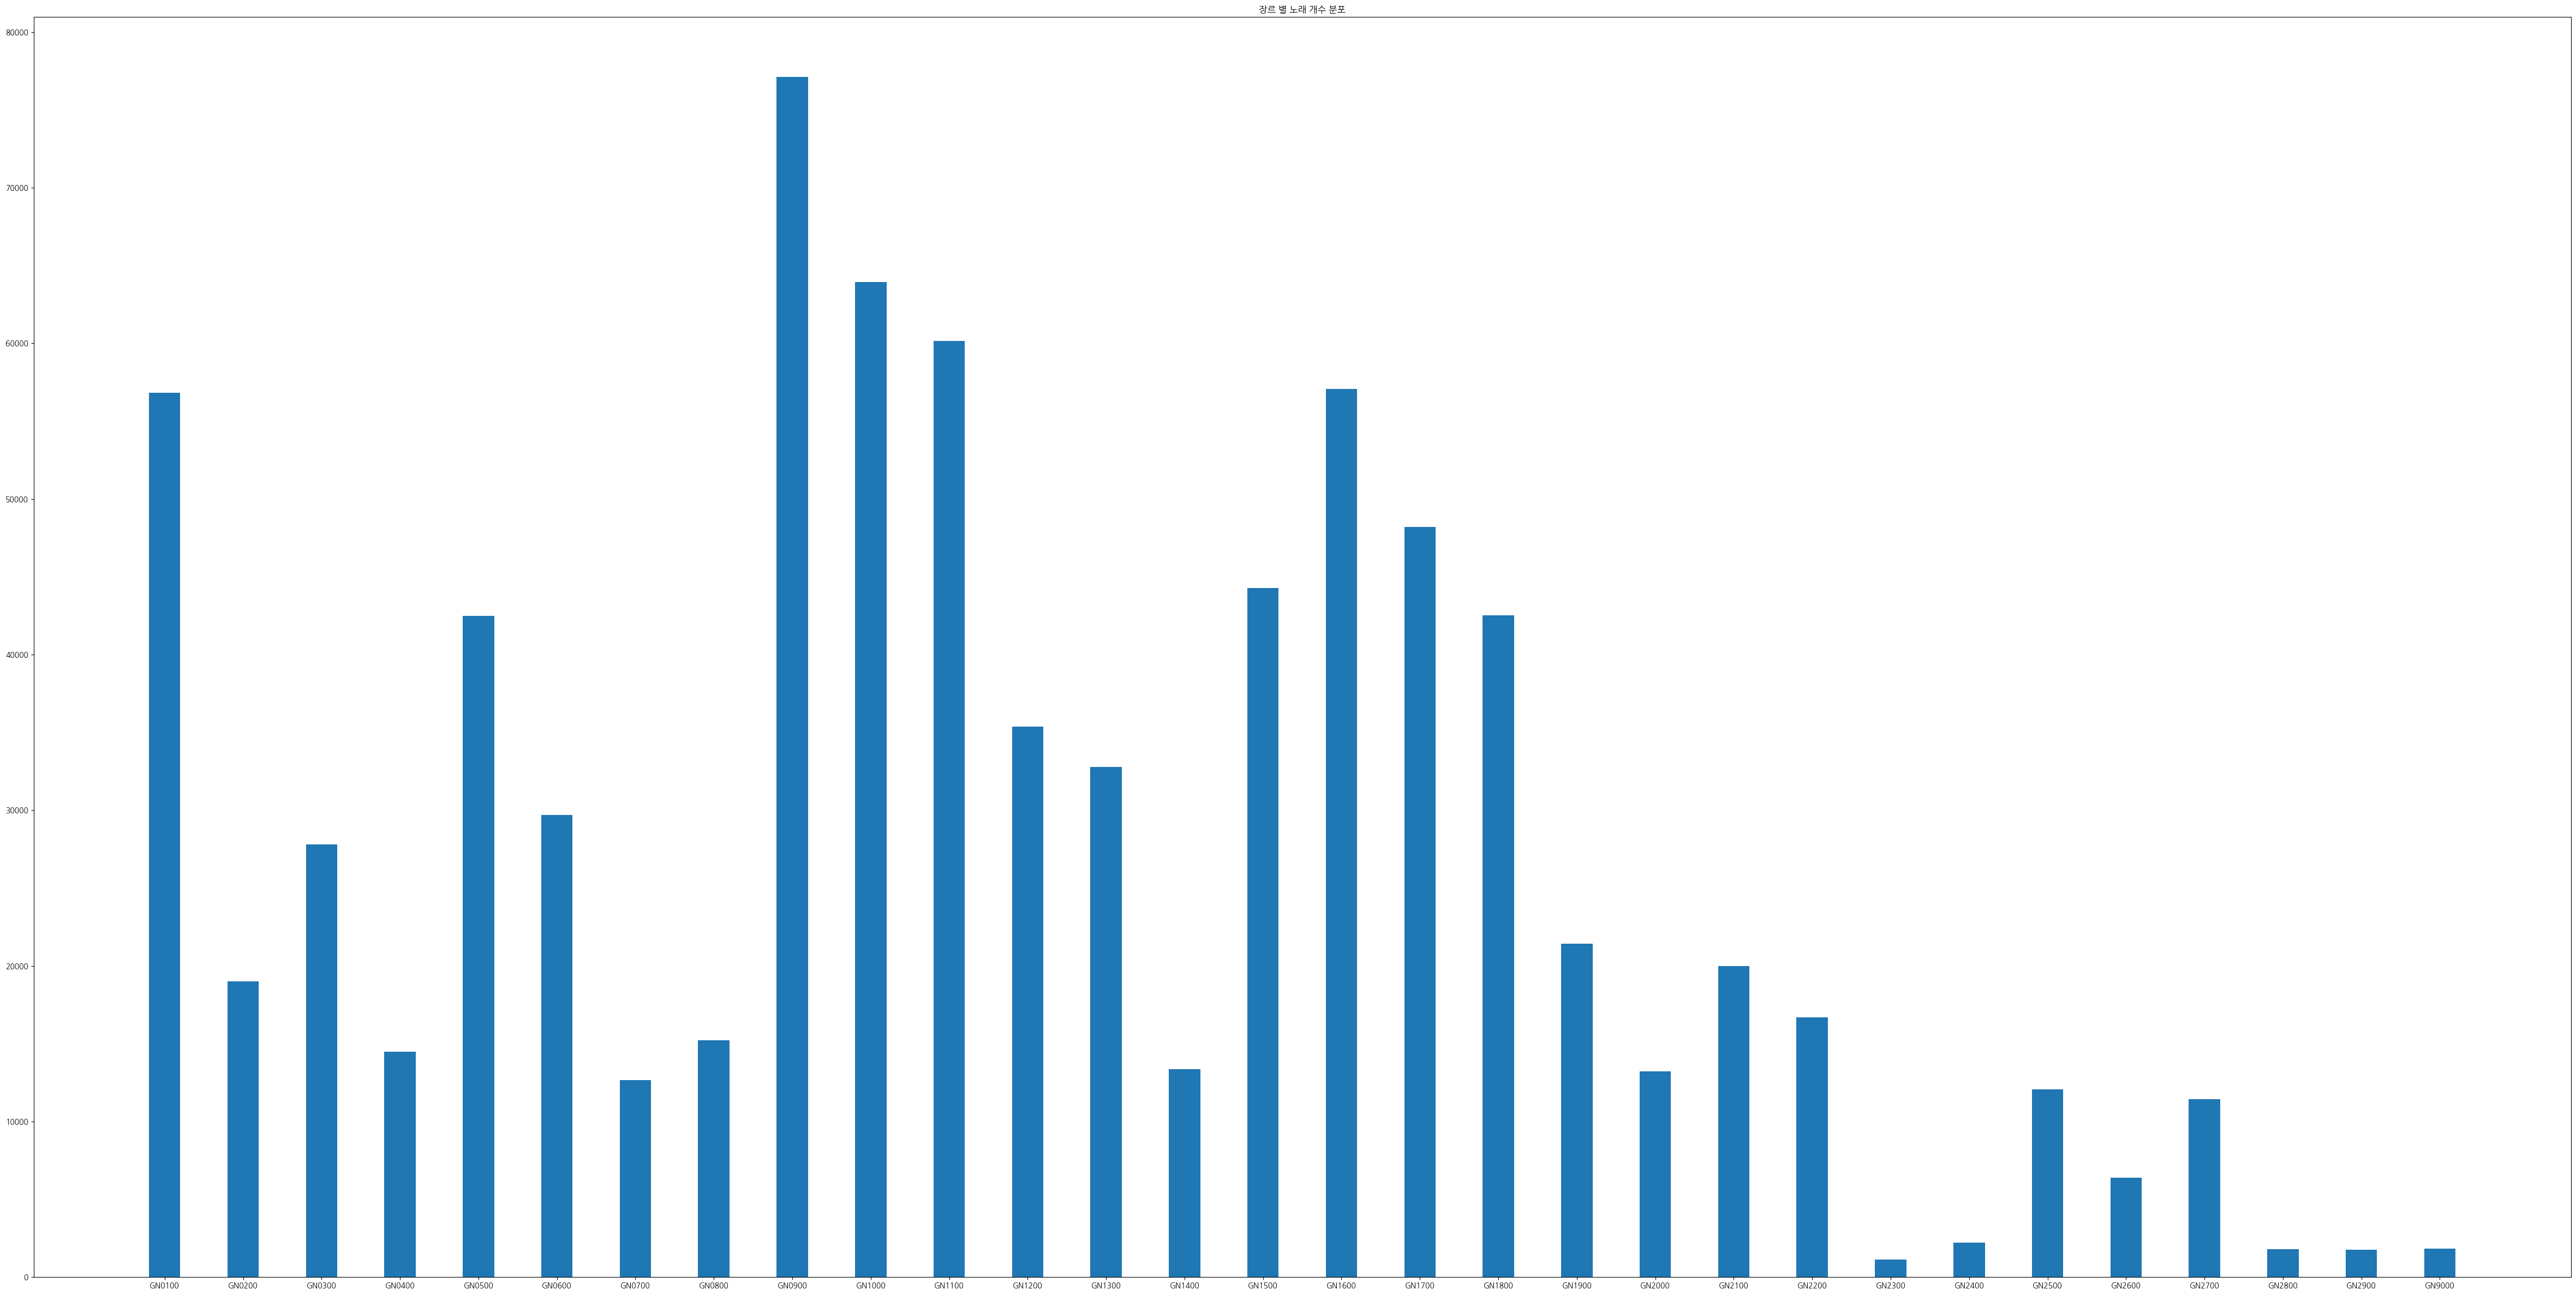

In [9]:
song_gnr = song_meta.explode('song_gn_gnr_basket').groupby('song_gn_gnr_basket')['id'].count().reset_index().rename(columns={'song_gn_gnr_basket':'song_gnr', 'id':'id_cnt'})

plt.figure(figsize=(60, 30))
plt.bar(song_gnr['song_gnr'], song_gnr['id_cnt'], width=0.4)
plt.title('장르 별 노래 개수 분포')
plt.rc('font', size=30)  
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 


In [10]:
gnr_outlier = song_meta.explode('song_gn_gnr_basket')
gnr_outlier[gnr_outlier['song_gn_gnr_basket'] == 'GN9000']

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
262,[],20150318,노년의 건강을 지켜주는 음악 처방전 (부제 : 휴식 때 들으면 좋은 음악친구),2309524,[726909],Bio Sound `Breathing & Big Bell`,GN9000,[차병원],262
916,[],20170825,크리스마스의 기적,10090652,[750416],Springtime In December,GN9000,[Larry Warren],916
1074,[],20131128,Open It Up,10008901,[1221466],Open It Up,GN9000,[Tchengiz],1074
2205,[],20161130,크리스마스 하프 감성 연주곡 베스트,10019367,[923656],고요한 밤 거룩한 밤 (Silent Night Holy Night) (크리스마스 하프),GN9000,[크리스마스 캐롤송],2205
3973,[],20181210,크리스마스 재즈 캐롤 노래 연주곡 캐롤송 메들리,10230803,[2403083],The First Noel (Jazz),GN9000,[크리스마스],3973
...,...,...,...,...,...,...,...,...,...
706172,[],20190924,여행(Travel),10331385,[2739231],여행(Travel),GN9000,[카무 (Kamoo)],706172
706502,[],20110831,엄마와 아가와의 행복한 대화 태교음악 뉴에이지,2009854,[561734],Love Love Love,GN9000,[해피타임뮤직],706502
706716,[],20200109,Have It All,10373946,[2762722],Have It All,GN9000,[Renegade],706716
707201,[],20200115,모두의 MR반주 123,10376105,[770787],Into the Unknown (겨울왕국 2 OST) (Melody MR),GN9000,[모두의MR],707201


=> GN9000 장르를 가진 song 삭제

## 2) Playlists

> playlist_title

- 플레이리스트 내 곡들의 평균 발매일
    - 가장 오래된 노래의 발매일, 가장 최신 노래의 발매일, 평균

In [113]:
# 플레이리스트와 song_meta의 issue_date merge
song_meta_issue_date = song_meta[['issue_date', 'id']]
ply_song = playlists.explode('songs')
ply_song_issue_date = pd.merge(ply_song, song_meta_issue_date, how='left', left_on='songs', right_on='id')

# 플레이리스트 id 기준으로 songs, issue_date 하나의 리스트에 담기
grouped_ply = ply_song_issue_date.groupby('id_x').agg({'songs': list, 'issue_date': list}).reset_index()

# 플레이리스트 id 기준으로 원래 playlists와 merge
playlists_date = pd.merge(playlists, grouped_ply, how='left', left_on='id', right_on='id_x')
playlists_date = playlists_date[['tags', 'id', 'plylst_title', 'songs_x', 'like_cnt', 'updt_date', 'issue_date']]
playlists_date

,tags,id,plylst_title,songs_x,like_cnt,updt_date,issue_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,"[20130506, 20130917, 19911021, 20000919, 20050..."
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,"[20030314, 20061204, 20061204, 20071023, 20080..."
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,"[20081029, 20081029, 20140818, 20141126, 20141..."
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,"[20191115, 19981201, 20061124, 20101102, 20101..."
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,"[20010619, 19970520, 19970514, 19940900, 20020..."
...,...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000,"[20040117, 20011108, 20011108, 20011108, 20001..."
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000,"[20151208, 20151216, 20150224, 20150820, 20150..."
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000,"[20170216, 20190409, 20070608, 20080403, 20080..."
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000,"[19980116, 20030407, 20060706, 20091016, 20100..."


In [114]:
playlists_date['date_old'] = playlists_date['issue_date'].apply(min) # 가장 오래된 노래 발매일
playlists_date['date_new'] = playlists_date['issue_date'].apply(max) # 가장 최신 노래 발매일
playlists_date

,tags,id,plylst_title,songs_x,like_cnt,updt_date,issue_date,date_old,date_new
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,"[20130506, 20130917, 19911021, 20000919, 20050...",19911021,20131122
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,"[20030314, 20061204, 20061204, 20071023, 20080...",20030314,20141020
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,"[20081029, 20081029, 20140818, 20141126, 20141...",20081029,20170110
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,"[20191115, 19981201, 20061124, 20101102, 20101...",19981201,20191115
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,"[20010619, 19970520, 19970514, 19940900, 20020...",19940301,20090824
...,...,...,...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000,"[20040117, 20011108, 20011108, 20011108, 20001...",19920609,20180101
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000,"[20151208, 20151216, 20150224, 20150820, 20150...",20150224,20151216
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000,"[20170216, 20190409, 20070608, 20080403, 20080...",20070608,20190409
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000,"[19980116, 20030407, 20060706, 20091016, 20100...",19980116,20190621


In [115]:
# 가장 오래된 노래
min_value = playlists_date['date_new'].min() # 0
next_min_value = playlists_date['date_new'][playlists_date['date_new'] > min_value].min() # 19731100
playlists_date['date_new'][playlists_date['date_new'] > next_min_value].min() #19750201

19750201

In [116]:
# 가장 최신 노래
print(playlists_date['date_new'].max())# 20220113

20220113


- 중복된 타이틀 확인

In [117]:
# 1. 플레이리스트 아이디(id)와 플레이리스트 명(plylst_title) 추출
plylst_title = playlists[['id', 'plylst_title']]

# 2. 플레이리스트 이름 별 플레이리스트 ID count 테이블 생성 : plylst_id_cnt
plylst_id_cnt = plylst_title.groupby('plylst_title').id.nunique().reset_index(name = 'mapping_plylst_cnt')

# 3. 플레이리스트 명 중복 구분 : 서로 다른 플레이리스트 아이디로 겹치는 플레이리스트 이름이 없으면 '중복 없음', 그 외 '중복 있음'
plylst_id_cnt = plylst_id_cnt.assign(
    mapping_plylst_cnt_category = pd.cut(plylst_id_cnt['mapping_plylst_cnt'], [0, 1, np.inf], labels = ['중복 없음', '중복 있음'])
)
plylst_id_cnt
# [0, 1, np.inf] : 0이상 1미만 값 = 중복없음, 1이상의 값 = 중복있음

# 4. 중복 구분 별 플레이리스트 수 count 테이블 생성 : plylst_id_cnt_division
plylst_id_cnt_division = pd.DataFrame(plylst_id_cnt.groupby('mapping_plylst_cnt_category').count())
plylst_id_cnt_division


,plylst_title,mapping_plylst_cnt
mapping_plylst_cnt_category,,
중복 없음,108214,108214
중복 있음,2317,2317


=> 전체의 2.09%는 같은 플레이리스트 타이틀을 갖고 있음

- 중복된 타이틀 들의 좋아요, 노래, 태그 개수 비교

In [118]:
# 플레이리스트 타이틀을 기준으로 merge해 중복된 플레이리스트만 확인
playlists_dup = pd.merge(playlists, plylst_id_cnt, on='plylst_title')
playlists_dup= playlists_dup[playlists_dup['mapping_plylst_cnt_category'] == '중복 있음']
playlists_dup['song_cnt'] = playlists_dup['songs'].apply(len)
playlists_dup['tag_cnt'] = playlists_dup['tags'].apply(len)
playlists_dup.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,special_char_count,special_tag_char_count,tags_str,mapping_plylst_cnt,mapping_plylst_cnt_category,song_cnt,tag_cnt
16,"[감성, 질리지않는, 나만알고싶은, Pop]",1516,나만 알고싶은 노래들,"[331055, 99287, 310974, 376435, 146989, 430106...",1,2018-01-02 12:10:59.000,0,11,"'감성', '질리지않는', '나만알고싶은', 'Pop'",4,중복 있음,31,4
17,"[기분전환, 까페]",86179,나만 알고싶은 노래들,"[480142, 578916, 467225, 701072, 197046, 63557...",6,2016-10-06 02:08:40.000,0,5,"'기분전환', '까페'",4,중복 있음,46,2
18,"[숨은명곡, 좋은노래]",54673,나만 알고싶은 노래들,"[113618, 422482, 380069, 75425, 79141, 657137,...",7,2016-07-15 10:20:17.000,0,5,"'숨은명곡', '좋은노래'",4,중복 있음,23,2
19,"[감성힙합, 나만알고싶은, 뿜뿜, 그루브, 노래, 감성]",135616,나만 알고싶은 노래들,"[470548, 603591, 382764, 288501, 187291, 37802...",30,2018-07-13 08:18:54.000,0,17,"'감성힙합', '나만알고싶은', '뿜뿜', '그루브', '노래', '감성'",4,중복 있음,45,6
46,"[월드, 연주, 재즈]",109678,"영화, Jazz를 만나다 294","[134115, 150481, 2861, 321479, 252928, 360185,...",0,2019-03-27 15:29:18.000,1,8,"'월드', '연주', '재즈'",3,중복 있음,27,3


In [119]:
# 같은 타이틀을 가진 플레이리스트의 노래 개수 비교
# playlists_dup에서 타이틀별로 groupby 후 song_cnt 값들을 song_cnt_nunique(새 컬럼)에 리스트 형태로 넣은 후 중복을 없애기 위해 set 진행
# 1의 의미는 노래 갯수가 중복되어 있다는 뜻이기 때문에 1의 갯수가 적은 지표를 기준으로 중복 플레이리스트 제거를 진행해야함

playlists_dup_song_cnt = playlists_dup.groupby('plylst_title')['song_cnt'].apply(list).reset_index()
playlists_dup_song_cnt['song_cnt_nunique'] = playlists_dup_song_cnt['song_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_song_cnt['song_cnt_nunique'])

Counter({2: 1256,
         1: 514,
         4: 110,
         3: 289,
         19: 2,
         8: 13,
         13: 3,
         16: 2,
         5: 49,
         6: 35,
         7: 18,
         14: 3,
         20: 1,
         15: 3,
         11: 5,
         9: 4,
         10: 6,
         12: 2,
         21: 1,
         18: 1})

In [120]:
# 같은 타이틀을 가진 플레이리스트의 태그 개수 비교

playlists_dup_tag_cnt = playlists_dup.groupby('plylst_title')['tag_cnt'].apply(list).reset_index()
playlists_dup_tag_cnt['tag_cnt_nunique'] = playlists_dup_tag_cnt['tag_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_tag_cnt['tag_cnt_nunique'])

Counter({1: 1180, 2: 952, 3: 121, 4: 44, 6: 8, 5: 12})

In [121]:
# 같은 타이틀을 가진 플레이리스트의 좋아요 비교

playlists_dup_like_cnt = playlists_dup.groupby('plylst_title')['like_cnt'].apply(list).reset_index()
playlists_dup_like_cnt['like_cnt_nunique'] = playlists_dup_like_cnt['like_cnt'].apply(lambda x: len(set(x)))
Counter(playlists_dup_like_cnt['like_cnt_nunique'])

Counter({2: 1482,
         1: 416,
         3: 244,
         4: 76,
         20: 1,
         7: 10,
         8: 6,
         12: 3,
         5: 42,
         6: 21,
         9: 5,
         11: 2,
         10: 5,
         14: 1,
         15: 1,
         13: 1,
         24: 1})

=> 노래 개수 or 좋아요를 많이 가진 플리로 남기자

- 불용어 확인

In [122]:
# 특수문자가 많은 plylst_title을 찾는 함수 정의
def count_special_chars(title):
    count = sum(1 for char in title if char in string.punctuation)
    return count

In [123]:
# 특수문자 개수를 계산하여 새로운 컬럼 추가
playlists['special_char_count'] = playlists['plylst_title'].apply(count_special_chars)

# 특수문자 개수에 따라 데이터프레임 정렬
sorted_df = playlists.sort_values(by='special_char_count', ascending=False)

# 정렬된 데이터프레임 출력
sorted_df[['plylst_title', 'special_char_count']].head(10)

,plylst_title,special_char_count
93770,내가 아팠다고....아파 한다고....하지만 숨길수 밖에 없었던 날....그래......,28
25748,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
106802,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
100143,Let`s Rock!!!!!!!!!!!!!!!!!!!!!!!,24
42277,2005~2006 주름 잡았던 히트곡!!!!!!!!!!!!!!!!!!!!!!!,24
77720,나는 솔로다!!!!!!!!!!!!!!!!!!!!!!!,23
5697,반쪽짜리 사랑.....짝사랑.................,22
56134,내적댄스 터져베이베 !!!!! 아이돌 노래노래!!!@!@!!!!!!!!!,20
59162,"가을이다..\(^o^)/ ,곧 겨울이다...((T^T) ;;;;",20
19571,승훈좋아.................,17


In [124]:
playlists['tags_str'] = playlists['tags'].apply(lambda x : str(x).strip('[]'))
playlists['tags_str']

0                                                       '락'
1                                                '추억', '회상'
2                                               '까페', '잔잔한'
3         '연말', '눈오는날', '캐럴', '분위기', '따듯한', '크리스마스캐럴', '...
4                                                      '댄스'
                                ...                        
115066     '록메탈', '밴드사운드', '록', '락메탈', '메탈', '락', 'extreme'
115067                                                 '일렉'
115068    '담시', '가족', '눈물', '그리움', '주인공', '나의_이야기', '사랑'...
115069              '잔잔한', '버스', '퇴근버스', 'Pop', '풍경', '퇴근길'
115070                         '노래추천', '팝송추천', '팝송', '팝송모음'
Name: tags_str, Length: 115071, dtype: object

In [125]:
import string

def count_special_tag_chars(title):
    special_chars = string.punctuation + '_'
    count = sum(1 for char in title if char in special_chars)
    return count

# 특수문자 개수를 계산하여 새로운 컬럼 추가
playlists['special_tag_char_count'] = playlists['tags_str'].apply(count_special_tag_chars)

# 특수문자 개수에 따라 데이터프레임 정렬
sorted_df = playlists.sort_values(by='special_tag_char_count', ascending=False)

# 정렬된 데이터프레임 출력
sorted_df[['tags', 'special_tag_char_count']].head(10)

,tags,special_tag_char_count
2896,"[사실상_친구_같은_편안함, 태그는_이쯤에서_그만두죠, 발라드가_많아서_미안해요, ...",39
20705,"[나만을_위해_노래, 제이슨_므라즈, 잔잔한, 제임스_블런트, 콜드플레이, 에드_시...",36
28664,"[1960_70, 1950_60, label_crew, 2000_10, icons,...",35
61032,"[술, 너의_음성을, 보고싶다_나의당신, 기억들, 한_잔에, 너와의, 끝나지않는, ...",35
50476,"[잔잔한, 수록곡, 서은광_이민혁_이창섭_임현식, 아이돌숨은명곡들, 잘때듣는노래, ...",34
32367,"[카페_음악, 밤, space, UNIVERSE, 새벽, 우주, 방안, 조용한음악,...",34
20647,"[겨울을_준비하는, 유니크한, 카페, 신비롭고, 짙고_매혹적인_음색, 감성사운드, ...",34
81626,"[kpop, 샤워, 운동, 흐리고_비, 여행, 파워풀_에너제틱, 파티, 힘이_나는,...",34
31306,"[집중력, 음악, 카페, 공부가_잘되는_음악, 연주, 수능, 뉴에이지, 시험, 백점...",34
98163,"[응원, 출근, 새해, 기분전환, 새학기_개학, 입학, 힘이_나는, 희망, 시작_출...",33


=> 특수문자 제거, all 숫자인 타이틀을 가진 플레이리스트 삭제  
=> 불용어를 처리하고 나면 중복되는 내용이 또 있을테니, 불용어부터 처리

> songs

- 플리 별 곡 분포 - boxplot

Text(0.5, 1.0, '플레이리스트 별 노래 갯수 분포')

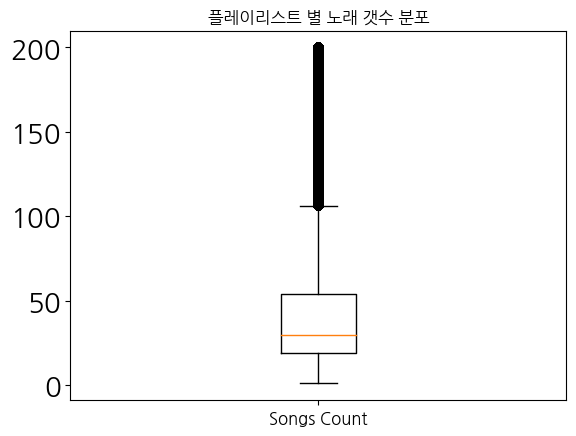

In [134]:
# 플리 별 노래 갯수 분포

playlists['songs_cnt'] = playlists['songs'].apply(len)
hist_color = '#8E7EFF' 

boxplot = plt.boxplot(playlists['songs_cnt'])
plt.xticks([1], ['Songs Count'], fontsize=12)
plt.title('플레이리스트 별 노래 갯수 분포', fontsize=12)

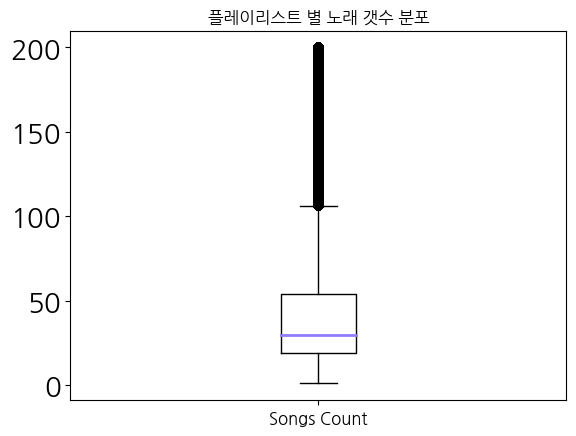

In [137]:
import matplotlib.pyplot as plt

# 데이터 생성 예시
# playlists['songs_cnt'] = playlists['songs'].apply(len)

# 박스플롯 생성
boxplot = plt.boxplot(playlists['songs_cnt'])

# 중앙값 색상 설정 (보라색)
for median in boxplot['medians']:
    median.set(color='#8E7EFF', linewidth=2)

# X 축 레이블 및 제목 설정
plt.xticks([1], ['Songs Count'], fontsize=12)
plt.title('플레이리스트 별 노래 갯수 분포', fontsize=12)

plt.show()

In [127]:
playlists['songs_cnt'].describe()

count    115071.000000
mean         45.935735
std          43.950335
min           1.000000
25%          19.000000
50%          30.000000
75%          54.000000
max         200.000000
Name: songs_cnt, dtype: float64

In [128]:
Q1 = 19
Q3 = 54
IQR = Q3 - Q1

print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

-33.5
106.5


In [129]:
# 박스 플롯의 아웃라이어 값
outlier_points = [flier.get_ydata() for flier in boxplot['fliers']]

# 박스 플롯의 수염(whiskers) 값
whisker_values = [whiskers.get_ydata() for whiskers in boxplot['whiskers']]

# 수염 값 정렬
sorted_outlier_points = [sorted(flier) for flier in outlier_points]

# 결과 출력
print("수염(whiskers) 값:", whisker_values)
print("아웃라이어 값(정렬):", sorted_outlier_points) # 107~200

수염(whiskers) 값: [array([19.,  1.]), array([ 54., 106.])]
아웃라이어 값(정렬): [[107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 108, 108

=> 5~106개만 남겨야 함

- 플리 별 곡 분포 - 정규분포

In [130]:
playlists['songs_cnt'] = playlists['songs'].apply(lambda x : len(x))

In [131]:
playlists['songs_cnt'].describe()

count    115071.000000
mean         45.935735
std          43.950335
min           1.000000
25%          19.000000
50%          30.000000
75%          54.000000
max         200.000000
Name: songs_cnt, dtype: float64

(array([    0., 10000., 20000., 30000., 40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000')])

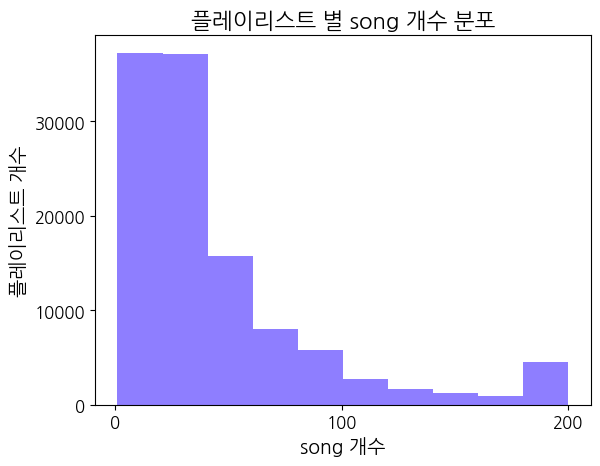

In [133]:
plt.hist(playlists['songs_cnt'], color='#8E7EFF')


plt.title("플레이리스트 별 song 개수 분포", fontsize=16)
plt.xlabel("song 개수", fontsize=14)
plt.ylabel("플레이리스트 개수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [52]:
import numpy as np
from scipy import stats

# songs_cnt 열의 데이터 추출
songs_cnt_data = playlists['songs_cnt']

# 정규분포의 평균과 표준 편차 추정
mean, std_dev = stats.norm.fit(songs_cnt_data)

# 신뢰 수준 (일반적으로 95%)에 해당하는 신뢰 구간 계산
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha / 2)  # 신뢰 수준에 해당하는 Z-점수 계산
margin_of_error = z_score * (std_dev / np.sqrt(len(songs_cnt_data)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# 정규분포의 범위 확인
print(f"평균: {mean:.2f}")
print(f"표준 편차: {std_dev:.2f}")
print(f"{confidence_level*100}% 신뢰 수준의 신뢰 구간: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

평균: 45.94
표준 편차: 43.95
95.0% 신뢰 수준의 신뢰 구간: (45.68, 46.19)


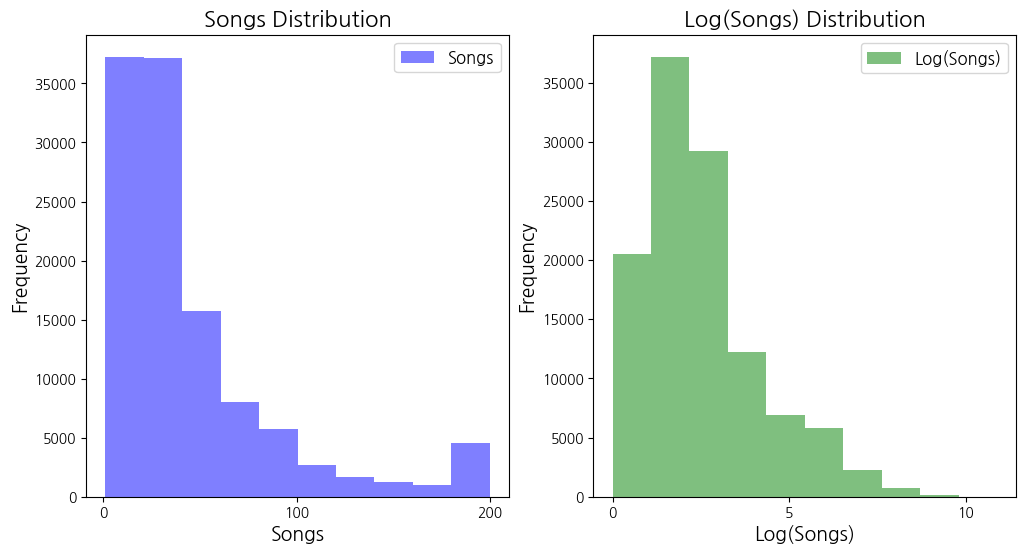

In [87]:
# 로그 변환 적용
playlists['log_songs'] = np.log1p(playlists['songs_cnt'])  # np.log1p를 사용하여 0이하 값의 로그를 취함

# 좋아요 수의 로그 변환 결과를 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(playlists['songs_cnt'], bins=10, color='b', alpha=0.5, label='Songs')
plt.title('Songs Distribution', fontsize=16)
plt.xlabel('Songs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(playlists['log_likes'], bins=10, color='g', alpha=0.5, label='Log(Songs)')
plt.title('Log(Songs) Distribution', fontsize=16)
plt.xlabel('Log(Songs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [88]:
import scipy
scipy.stats.skew(songs_cnt_data) # 왜도 값

2.1036129520649274

> like_cnt

- 플리 별 좋아요 분포 - boxplot

Text(0.5, 1.0, '플레이리스트 별 좋아요 수 분포')

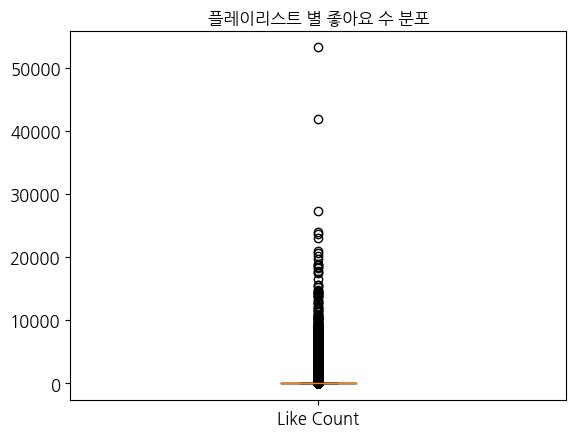

In [86]:
# 플리 별 좋아요 분포

boxplot = plt.boxplot(playlists['like_cnt'])
plt.xticks([1], ['Like Count'], fontsize=12) 
plt.yticks(fontsize=12)
plt.title('플레이리스트 별 좋아요 수 분포', fontsize=12)

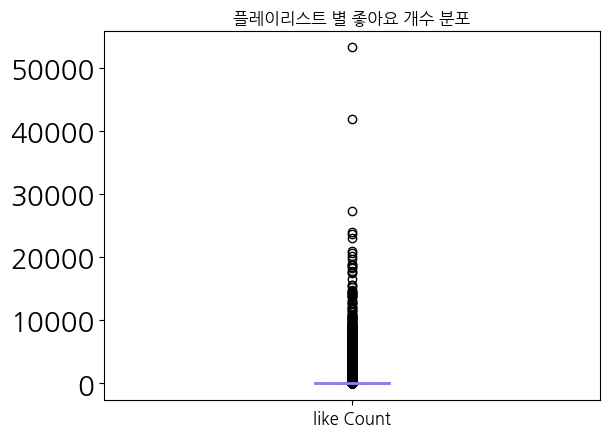

In [139]:
# 박스플롯 생성
boxplot = plt.boxplot(playlists['like_cnt'])

# 중앙값 색상 설정 (보라색)
for median in boxplot['medians']:
    median.set(color='#8E7EFF', linewidth=2)

# X 축 레이블 및 제목 설정
plt.xticks([1], ['like Count'], fontsize=12)
plt.title('플레이리스트 별 좋아요 개수 분포', fontsize=12)

plt.show()

- 플리 별 곡 분포 - 정규분포

In [156]:
playlists['like_cnt'].describe()

count    115071.000000
mean         95.197687
std         560.653757
min           0.000000
25%           2.000000
50%           7.000000
75%          24.000000
max       53211.000000
Name: like_cnt, dtype: float64

In [157]:
playlists.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,special_char_count,special_tag_char_count,tags_str,songs_cnt
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,0,2,'락',19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,0,5,"'추억', '회상'",42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,3,5,"'까페', '잔잔한'",28
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,0,29,"'연말', '눈오는날', '캐럴', '분위기', '따듯한', '크리스마스캐럴', '...",38
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,0,2,'댄스',53


In [158]:
ply_like_cnt = playlists.groupby('like_cnt').size().reset_index(name='playlist_count')
ply_like_cnt['rate'] = ply_like_cnt['playlist_count'].apply(lambda x: (x/ply_like_cnt['playlist_count'].sum())*100)
ply_like_cnt

,like_cnt,playlist_count,rate
0,0,10356,8.999661
1,1,10197,8.861486
2,2,8499,7.385875
3,3,7463,6.485561
4,4,6465,5.618270
...,...,...,...
2424,23732,1,0.000869
2425,23965,1,0.000869
2426,27268,1,0.000869
2427,41844,1,0.000869


In [159]:
playlists['like_cnt'].sum()

10954493

In [160]:
109544930*0.1

10954493.0

In [161]:
ply_like_cnt.tail(10954493)['like_cnt'].sum() / 10954493 *100

48.10218966774637

In [162]:
ply_like_cnt = pd.DataFrame(playlists.groupby('like_cnt').count()['id'].reset_index(drop=True)).rename(columns={'id':'id_cnt'})
ply_like_cnt['rate'] = ply_like_cnt['id_cnt'].apply(lambda x: (x/ply_like_cnt['id_cnt'].sum())*100)
ply_like_cnt

,id_cnt,rate
0,10356,8.999661
1,10197,8.861486
2,8499,7.385875
3,7463,6.485561
4,6465,5.618270
...,...,...
2424,1,0.000869
2425,1,0.000869
2426,1,0.000869
2427,1,0.000869


In [163]:
playlists['like_cnt'].describe()

count    115071.000000
mean         95.197687
std         560.653757
min           0.000000
25%           2.000000
50%           7.000000
75%          24.000000
max       53211.000000
Name: like_cnt, dtype: float64

In [164]:
Q1 = 2
Q3 = 24
IQR = Q3 - Q1

print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

-31.0
57.0


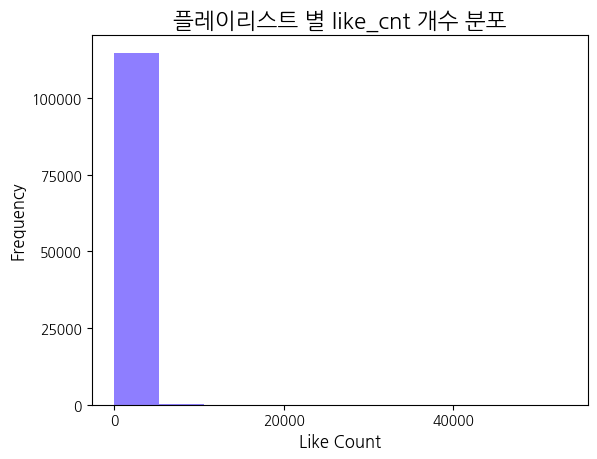

In [165]:
# 전체 Histogram
plt.hist(playlists['like_cnt'], color='#8E7EFF')

plt.title("플레이리스트 별 like_cnt 개수 분포", fontsize=16)
plt.xlabel('Like Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

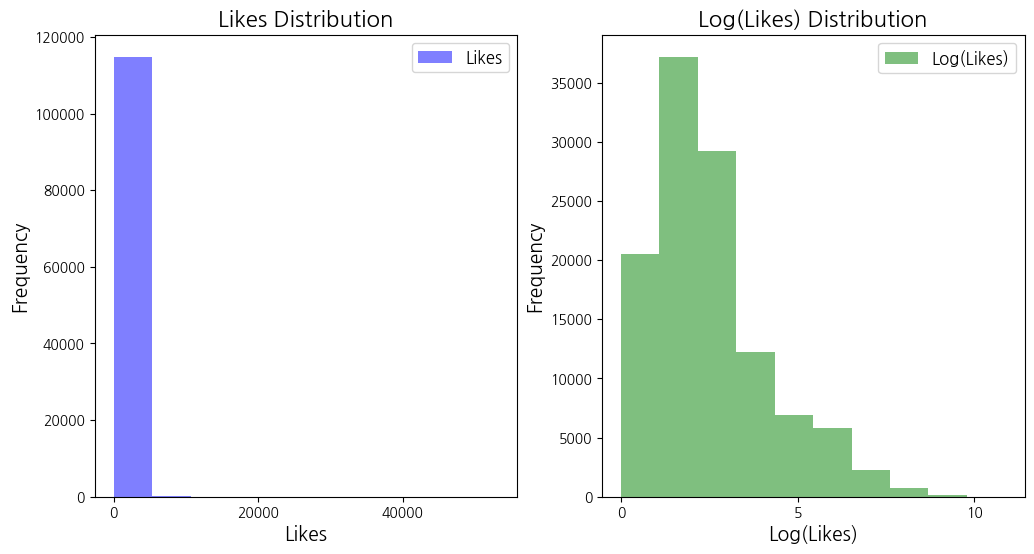

In [166]:
# 로그 변환 적용
playlists['log_likes'] = np.log1p(playlists['like_cnt'])  # np.log1p를 사용하여 0이하 값의 로그를 취함

# 좋아요 수의 로그 변환 결과를 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(playlists['like_cnt'], bins=10, color='b', alpha=0.5, label='Likes')
plt.title('Likes Distribution', fontsize=16)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(playlists['log_likes'], bins=10, color='g', alpha=0.5, label='Log(Likes)')
plt.title('Log(Likes) Distribution', fontsize=16)
plt.xlabel('Log(Likes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [167]:

playlists['log_likes'].describe()

count    115071.000000
mean          2.431437
std           1.721291
min           0.000000
25%           1.098612
50%           2.079442
75%           3.218876
max          10.882039
Name: log_likes, dtype: float64

In [168]:
Q1 = 1.098612
Q3 = 3.218876
IQR = Q3 - Q1

print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

-2.081784
6.399272


In [169]:
print(np.exp(Q1-(1.5*IQR))) # 지수 함수 계산
print(np.exp(Q3+(1.5*IQR)))

0.12470753538679492
601.4070541299369


In [170]:
Q1 = 1.098612
np.exp(Q1)
# 25% 구간 값

2.9999991339957957

=> 좋아요 수의 편차가 심하다.

- song 별 플리에 사용된 횟수

In [186]:
# playlists.explode('songs').groupby('songs').count()['id'].describe()
playlists['songs_cnt'].describe()

count    115071.000000
mean         45.935735
std          43.950335
min           1.000000
25%          19.000000
50%          30.000000
75%          54.000000
max         200.000000
Name: songs_cnt, dtype: float64

In [172]:
Q1 = 19
Q3 = 54
IQR = Q3 - Q1

print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

-33.5
106.5


In [173]:
ply_song_freq = playlists.explode('songs').groupby('songs').count()['id']
ply_song_freq

songs
0          2
3          8
4          2
5          5
6          1
          ..
707984     1
707985     4
707986    11
707987     1
707988     1
Name: id, Length: 615142, dtype: int64

Text(0.5, 1.0, '플리 별 노래 개수 분포')

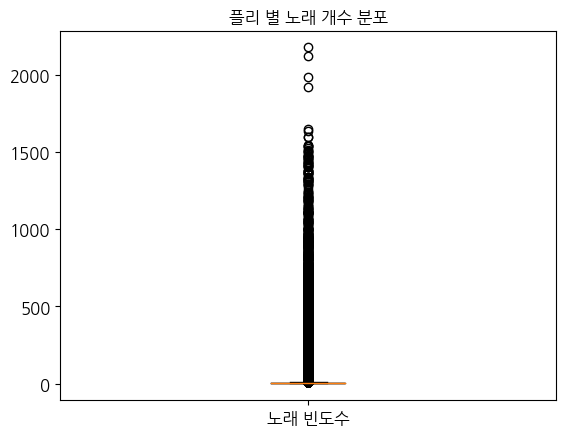

In [174]:
# 플리 별 노래 개수 분포

boxplot = plt.boxplot(ply_song_freq)
plt.xticks([1], ['노래 빈도수'], fontsize=12) 
plt.yticks(fontsize=12)
plt.title('플리 별 노래 개수 분포', fontsize=12)

(array([     0., 200000., 400000., 600000., 800000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200000.0, '200000'),
  Text(0, 400000.0, '400000'),
  Text(0, 600000.0, '600000'),
  Text(0, 800000.0, '800000')])

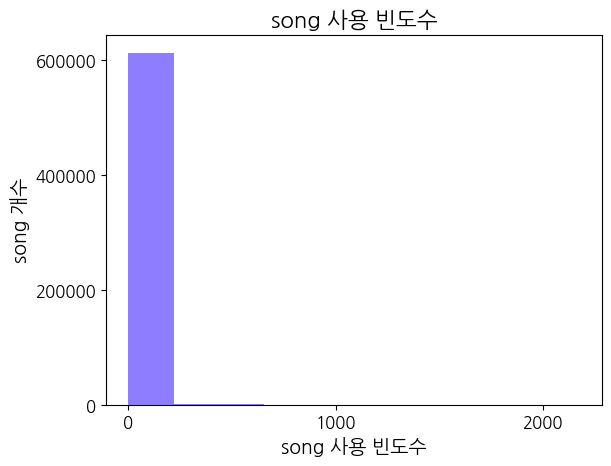

In [175]:
plt.hist(ply_song_freq, color='#8E7EFF')


plt.title("song 사용 빈도수", fontsize=16)
plt.xlabel("song 사용 빈도수", fontsize=14)
plt.ylabel("song 개수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

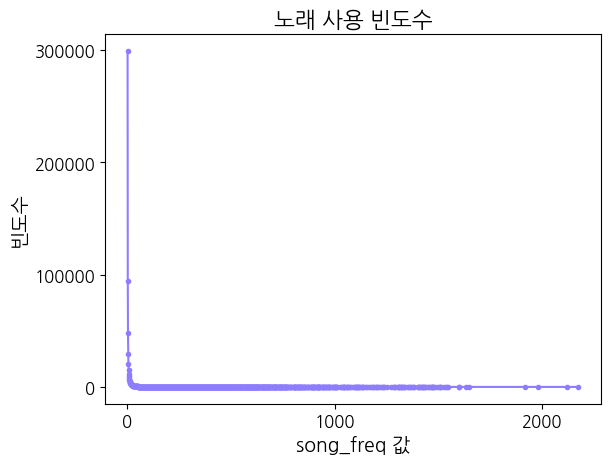

In [211]:
ply_song_freq_plot = pd.DataFrame(ply_song_freq).reset_index(drop=True).rename(columns={'id':'song_freq'})
ply_song_freq_plot

value_counts = ply_song_freq_plot['song_freq'].value_counts().sort_index()

x = value_counts.index  # x 축 데이터 (song_freq 값)
y = value_counts.values  # y 축 데이터 (빈도수)

plt.plot(x, y, color='#8E7EFF', marker='o', linestyle='-', markersize=3)

plt.title("노래 사용 빈도수", fontsize=16)
plt.xlabel("song_freq 값", fontsize=14)
plt.ylabel("빈도수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
plt.hist(ply_song_freq, color='#8E7EFF')


plt.title("song 사용 빈도수", fontsize=16)
plt.xlabel("song 사용 빈도수", fontsize=14)
plt.ylabel("song 개수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [187]:
ply_song_freq.describe()

count    615142.000000
mean          8.592928
std          39.481912
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2175.000000
Name: id, dtype: float64

In [176]:
# 정규분포의 평균과 표준 편차 추정
mean, std_dev = stats.norm.fit(ply_song_freq)

# 신뢰 수준 (일반적으로 95%)에 해당하는 신뢰 구간 계산
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha / 2)  # 신뢰 수준에 해당하는 Z-점수 계산
margin_of_error = z_score * (std_dev / np.sqrt(len(ply_song_freq)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# 정규분포의 범위 확인
print(f"평균: {mean:.2f}")
print(f"표준 편차: {std_dev:.2f}")
print(f"{confidence_level*100}% 신뢰 수준의 신뢰 구간: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

NameError: name 'stats' is not defined

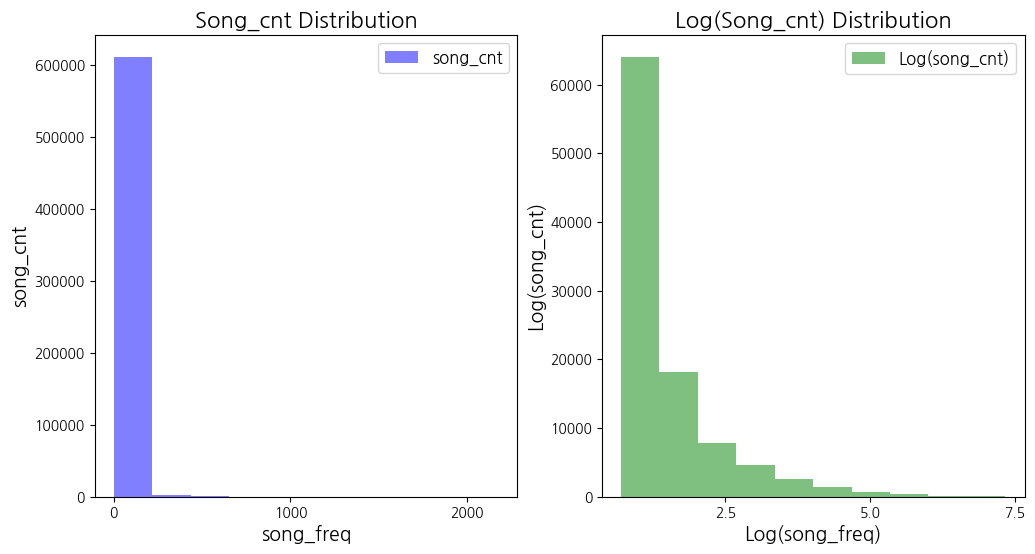

In [178]:
# 로그 변환 적용
playlists['song_freq'] = np.log1p(ply_song_freq)  # np.log1p를 사용하여 0이하 값의 로그를 취함

# 좋아요 수의 로그 변환 결과를 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ply_song_freq, bins=10, color='b', alpha=0.5, label='song_cnt')
plt.title('Song_cnt Distribution', fontsize=16)
plt.xlabel('song_freq', fontsize=14)
plt.ylabel('song_cnt', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(playlists['song_freq'], bins=10, color='g', alpha=0.5, label='Log(song_cnt)')
plt.title('Log(Song_cnt) Distribution', fontsize=16)
plt.xlabel('Log(song_freq)', fontsize=14)
plt.ylabel('Log(song_cnt)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [239]:
ply_song_freq_cnt = ply_song_freq.reset_index().groupby('id').count()['songs'].reset_index().rename(columns={'id':'freq', 'songs':'songs_cnt'})
ply_song_freq_cnt['songs_cnt_rate'] = ply_song_freq_cnt['songs_cnt'].apply(lambda x: x /ply_song_freq_cnt['songs_cnt'].sum()*100)
ply_song_freq_cnt['song_rate'] =ply_song_freq_cnt['freq'].apply(lambda x: x /ply_song_freq_cnt['freq'].sum()*100)
ply_song_freq_cnt

,freq,songs_cnt,songs_cnt_rate,song_rate
0,1,299028,48.611215,0.000192
1,2,94458,15.355479,0.000385
2,3,47587,7.735937,0.000577
3,4,29395,4.778571,0.000769
4,5,20048,3.259085,0.000961
...,...,...,...,...
952,1647,1,0.000163,0.316660
953,1919,1,0.000163,0.368955
954,1981,1,0.000163,0.380876
955,2121,1,0.000163,0.407793


In [ ]:
ply_song_freq_cnt.head(5)['songs_cnt_rate'].sum()

85.51097393689986

In [241]:
ply_song_freq_cnt.tail(30)['song_rate'].sum()

9.09276182089799

In [242]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


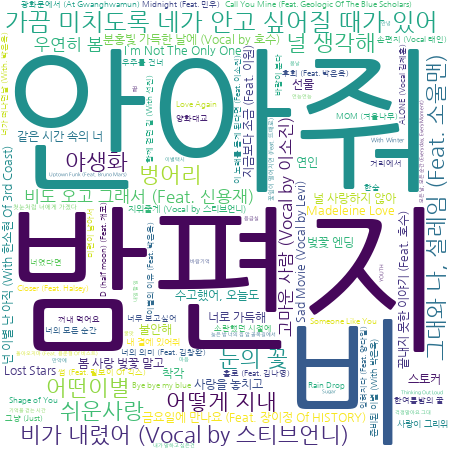

In [270]:
from wordcloud import WordCloud
plylst_song_map = playlists[['id', 'songs']]

# unnest songs
plylst_song_map_unnest = np.dstack(
    (
        np.repeat(plylst_song_map.id.values, list(map(len, plylst_song_map.songs))), 
        np.concatenate(plylst_song_map.songs.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_song_map = pd.DataFrame(data = plylst_song_map_unnest[0], columns = plylst_song_map.columns)
plylst_song_map['id'] = plylst_song_map['id'].astype(str)

# unnest 객체 제거
del plylst_song_map_unnest

# 태그 별 매핑 빈도 수 저장 
song_cnt = plylst_song_map.groupby('songs').songs.count().reset_index(name = 'mapping_cnt')
song_cnt['songs'] = song_cnt['songs'].astype(str)
song_cnt['mapping_cnt'] = song_cnt['mapping_cnt'].astype(int)

# 빈도 수가 1000회 이상인 태그만 저장
song_cnt = song_cnt[song_cnt['mapping_cnt'] >= 1000]
song_meta_tmp = song_meta[['song_name', 'id']]
song_cnt['songs'] = song_cnt['songs'].astype(int)

# 두 DataFrame을 'songs' 열과 'id' 열을 기준으로 병합
song_cnt_merged = pd.merge(song_cnt, song_meta_tmp, left_on='songs', right_on='id', how='left')

word_count = list(zip(song_cnt_merged['song_name'], song_cnt_merged['mapping_cnt']))

# plotting
wc = WordCloud(font_path = './font/NanumGothic.ttf', background_color = 'white', max_words = 100, width = 450, height = 450)
wc.generate_from_frequencies(dict(word_count)).to_image()

In [269]:
song_meta_tmp = song_meta[['song_name', 'id']]
song_cnt['songs'] = song_cnt['songs'].astype(int)

# 두 DataFrame을 'songs' 열과 'id' 열을 기준으로 병합
song_cnt_merged = pd.merge(song_cnt, song_meta_tmp, left_on='songs', right_on='id', how='left')

      songs  mapping_cnt                          song_name      id
0       250         1029               Love Blossom (러브블러썸)     250
1      6546         1103                             묘해, 너와    6546
2     11657         1452                         Lost Stars   11657
3     13198         1170                          기억을 걷는 시간   13198
4     13281         1473  넌 이별 난 아직 (With 한소현 Of 3rd Coast)   13281
..      ...          ...                                ...     ...
132  678762         1207               꽃잎이 떨어지면 (Feat. 뜨때로)  678762
133  680366         1467              끝내지 못한 이야기 (Feat. 호수)  680366
134  690604         1046                      축가 (Marry Me)  690604
135  701557         1507                              우연히 봄  701557
136  704707         1004                  빨간 맛 (Red Flavor)  704707

[137 rows x 4 columns]


C:\Users\cg063\AppData\Local\Temp\ipykernel_7992\3620498310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_meta_tmp['id'] = song_meta_tmp['id'].astype(int)


=> 50% 미만 빼기

> 태그

- 태그 별 플리에 사용된 횟수

In [179]:
playlists.explode('tags').groupby('tags').count()['id'].describe()

count    29160.000000
mean        16.335082
std        247.011075
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      16465.000000
Name: id, dtype: float64

In [180]:
Q1 = 1
Q3 = 3
IQR = Q3 - Q1

print(Q1-(1.5*IQR))
print(Q3+(1.5*IQR))

-2.0
6.0


In [181]:
ply_tag_freq = playlists.explode('tags').groupby('tags').count()['id']
ply_tag_freq

tags
          1
00        4
007       3
007시리즈    2
00s       3
         ..
힙해        5
힙힙힙       2
힛뎀포크      1
힛뎀폭       1
힛뎀폭스      2
Name: id, Length: 29160, dtype: int64

In [233]:
ply_tag_freq_cnt = ply_tag_freq.reset_index().groupby('id').count()['tags'].reset_index().rename(columns={'id':'freq', 'tags':'tags_cnt'})
ply_tag_freq_cnt['tags_cnt_rate'] = ply_tag_freq_cnt['tags_cnt'].apply(lambda x: x /ply_tag_freq_cnt['tags_cnt'].sum()*100)
ply_tag_freq_cnt['freq_rate'] =ply_tag_freq_cnt['freq'].apply(lambda x: x /ply_tag_freq_cnt['freq'].sum()*100)
ply_tag_freq_cnt

,freq,tags_cnt,tags_cnt_rate,freq_rate
0,1,17431,59.777092,0.000292
1,2,3944,13.525377,0.000584
2,3,1803,6.183128,0.000876
3,4,1053,3.611111,0.001168
4,5,704,2.414266,0.001460
...,...,...,...,...
388,10218,1,0.003429,2.984647
389,10796,1,0.003429,3.153479
390,11215,1,0.003429,3.275868
391,11417,1,0.003429,3.334872


In [237]:
ply_tag_freq_cnt.head(5)['tags_cnt_rate'].sum()

85.51097393689986

In [236]:
ply_tag_freq_cnt.tail(30)['freq_rate'].sum()

57.63161891853998

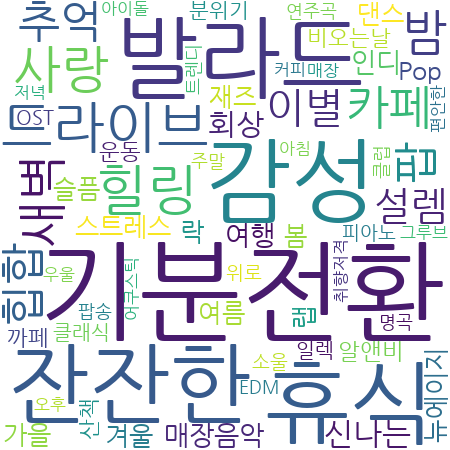

In [238]:
from wordcloud import WordCloud
plylst_tag_map = playlists[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest 객체 제거
del plylst_tag_map_unnest

# 태그 별 매핑 빈도 수 저장 
tag_cnt = plylst_tag_map.groupby('tags').tags.count().reset_index(name = 'mapping_cnt')
tag_cnt['tags'] = tag_cnt['tags'].astype(str)
tag_cnt['mapping_cnt'] = tag_cnt['mapping_cnt'].astype(int)

# 빈도 수가 1000회 이상인 태그만 저장
tag_cnt = tag_cnt[tag_cnt['mapping_cnt'] >= 1000]
word_count = list(zip(tag_cnt['tags'], tag_cnt['mapping_cnt']))

# plotting
wc = WordCloud(font_path = './font/NanumGothic.ttf', background_color = 'white', max_words = 100, width = 450, height = 450)
wc.generate_from_frequencies(dict(word_count)).to_image()

Text(0.5, 1.0, '플리 별 태그 개수 분포')

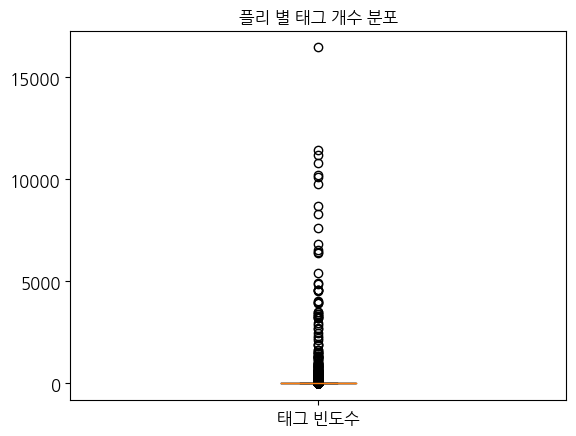

In [182]:
# 플리 별 태그 개수 분포

boxplot = plt.boxplot(ply_tag_freq)
plt.xticks([1], ['태그 빈도수'], fontsize=12) 
plt.yticks(fontsize=12)
plt.title('플리 별 태그 개수 분포', fontsize=12)

(array([    0., 10000., 20000., 30000., 40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000')])

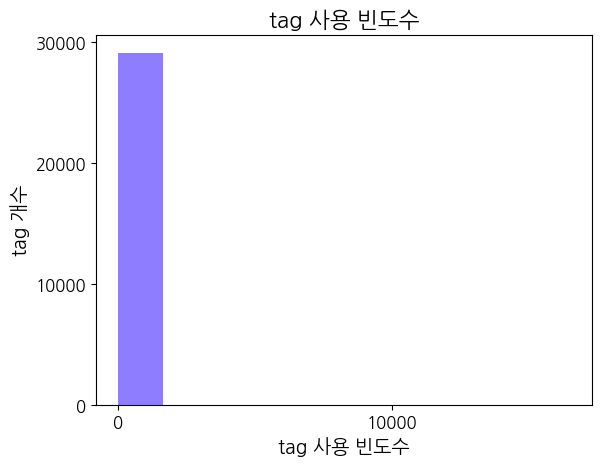

In [183]:
plt.hist(ply_tag_freq, color='#8E7EFF')


plt.title("tag 사용 빈도수", fontsize=16)
plt.xlabel("tag 사용 빈도수", fontsize=14)
plt.ylabel("tag 개수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

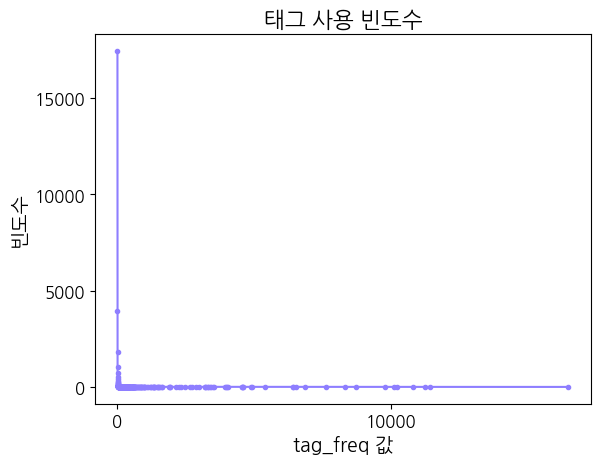

In [213]:
ply_tag_freq_plot = pd.DataFrame(ply_tag_freq).reset_index(drop=True).rename(columns={'id':'tag_freq'})
ply_tag_freq_plot

value_counts = ply_tag_freq_plot['tag_freq'].value_counts().sort_index()

x = value_counts.index  
y = value_counts.values 

plt.plot(x, y, color='#8E7EFF', marker='o', linestyle='-', markersize=3)

plt.title("태그 사용 빈도수", fontsize=16)
plt.xlabel("tag_freq 값", fontsize=14)
plt.ylabel("빈도수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [214]:
ply_tag_freq_plot

,tag_freq
0,1
1,4
2,3
3,2
4,3
...,...
29155,5
29156,2
29157,1
29158,1


In [81]:
# 정규분포의 평균과 표준 편차 추정
mean, std_dev = stats.norm.fit(ply_tag_freq)

# 신뢰 수준 (일반적으로 95%)에 해당하는 신뢰 구간 계산
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha / 2)  # 신뢰 수준에 해당하는 Z-점수 계산
margin_of_error = z_score * (std_dev / np.sqrt(len(ply_tag_freq)))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# 정규분포의 범위 확인
print(f"평균: {mean:.2f}")
print(f"표준 편차: {std_dev:.2f}")
print(f"{confidence_level*100}% 신뢰 수준의 신뢰 구간: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

평균: 16.34
표준 편차: 247.01
95.0% 신뢰 수준의 신뢰 구간: (13.50, 19.17)


c:\Users\cg063\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


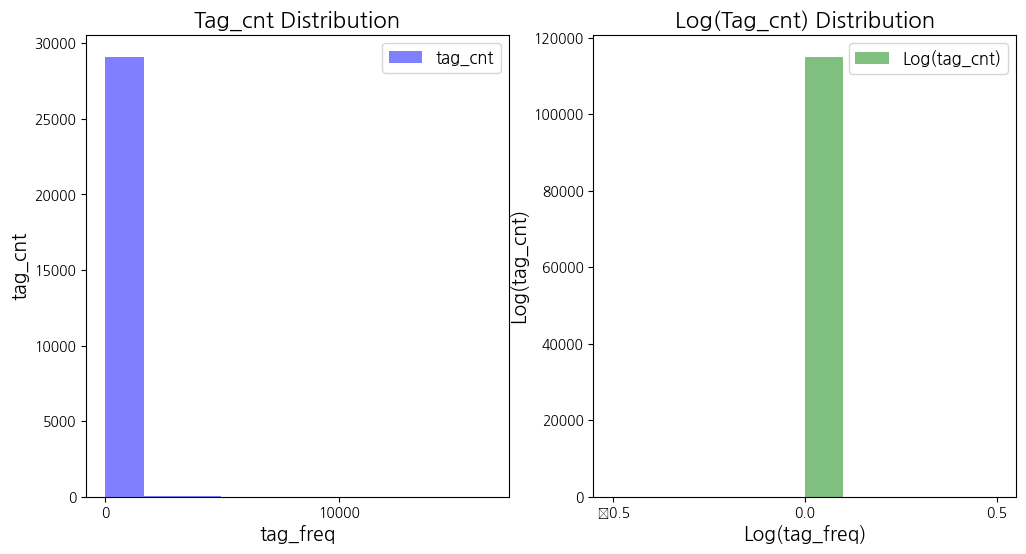

In [96]:
# 로그 변환 적용
# NaN 값을 0으로 대체
playlists['tag_freq'].fillna(0, inplace=True)
# 무한대 값을 NaN으로 대체
playlists['tag_freq'].replace([np.inf, -np.inf], np.nan, inplace=True)
# 로그 변환
playlists['tag_freq'] = np.log1p(playlists['tag_freq'])

# 좋아요 수의 로그 변환 결과를 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ply_tag_freq, bins=10, color='b', alpha=0.5, label='tag_cnt')
plt.title('Tag_cnt Distribution', fontsize=16)
plt.xlabel('tag_freq', fontsize=14)
plt.ylabel('tag_cnt', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(playlists['tag_freq'], bins=10, color='g', alpha=0.5, label='Log(tag_cnt)')
plt.title('Log(Tag_cnt) Distribution', fontsize=16)
plt.xlabel('Log(tag_freq)', fontsize=14)
plt.ylabel('Log(tag_cnt)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

=> 50% 미만 빼기(원래 아이디어)  
=> 통계적으로 확인이 아예 불가능한듯. 왜냐하면 평균, 표준편차가 수염범위에 안들어옴

> 플레이리스트의 태그와 좋아요, 노래개수의 상관 관계

In [39]:
playlists['tags_cnt'] = playlists['tags'].apply(len)
playlists['songs_cnt'] = playlists['songs'].apply(len)

playlists_corr = playlists[['tags_cnt', 'songs_cnt', 'like_cnt']]
playlists_corr.corr()

# 상관관계 없음

,tags_cnt,songs_cnt,like_cnt
tags_cnt,1.000000,0.063051,0.066963
songs_cnt,0.063051,1.000000,0.149828
like_cnt,0.066963,0.149828,1.000000


- 태그 별 매핑 장르 확인

### step1. 플레이리스트 태그 별 어떤 곡들이 수록되어 있을까?

In [40]:
# 플레이리스트 아이디(id)와 수록곡(songs) 추출
plylst_song_map = playlists[['id', 'songs']]

# unnest songs
plylst_song_map_unnest = np.dstack(
    (
        np.repeat(plylst_song_map.id.values, list(map(len, plylst_song_map.songs))), 
        np.concatenate(plylst_song_map.songs.values)
    )
)

# unnested 데이터프레임 생성 : plylst_song_map
plylst_song_map = pd.DataFrame(data = plylst_song_map_unnest[0], columns = plylst_song_map.columns)
plylst_song_map['id'] = plylst_song_map['id'].astype(str)
plylst_song_map['songs'] = plylst_song_map['songs'].astype(str)

# unnest 객체 제거
del plylst_song_map_unnest

# ===================================================================================================

# 플레이리스트 아이디(id)와 매핑된 태그(tags) 추출
plylst_tag_map = playlists[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest 객체 제거
del plylst_tag_map_unnest

# ===================================================================================================

# 곡 아이디(id)와 대분류 장르코드 리스트(song_gn_gnr_basket) 추출
song_gnr_map = song_meta.loc[:, ['id', 'song_gn_gnr_basket']]

# unnest song_gn_gnr_basket
song_gnr_map_unnest = np.dstack(
    (
        np.repeat(song_gnr_map.id.values, list(map(len, song_gnr_map.song_gn_gnr_basket))), 
        np.concatenate(song_gnr_map.song_gn_gnr_basket.values)
    )
)

# unnested 데이터프레임 생성 : song_gnr_map
song_gnr_map = pd.DataFrame(data = song_gnr_map_unnest[0], columns = song_gnr_map.columns)
song_gnr_map['id'] = song_gnr_map['id'].astype(str)
song_gnr_map.rename(columns = {'id' : 'song_id', 'song_gn_gnr_basket' : 'gnr_code'}, inplace = True)

# unnest 객체 제거
del song_gnr_map_unnest

In [41]:
# 장르코드 뒷자리 두 자리가 00인 코드를 필터링
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] == '00']
gnr_code = gnr_code.assign(join_code = gnr_code['gnr_code'].str[0:4])

In [42]:
plylst_song_tag_map = pd.merge(plylst_song_map, plylst_tag_map, how = 'left', on = 'id')

# 2. 1번 테이블 plylst_song_tag_map + 곡 장르 테이블 song_gnr_map join
plylst_song_tag_map = pd.merge(plylst_song_tag_map, song_gnr_map, how = 'left', left_on = 'songs', right_on = 'song_id')

# 3. 2번 테이블에서 장르 메타 join
gnr_code['gnr_code_name'] = gnr_code['gnr_code'] + ' (' + gnr_code['gnr_name'] + ')'
gnr_code = gnr_code[['gnr_code', 'gnr_code_name']]
plylst_song_tag_map = pd.merge(plylst_song_tag_map, gnr_code, how = 'left', on = 'gnr_code')

# 4. 최종 테이블 필드 선택
plylst_song_tag_map = plylst_song_tag_map[['id', 'songs', 'tags', 'gnr_code_name']]

In [45]:
# 태그 = ['드라이브', '스트레스', '기분전환']
song_tag_map_sample_1 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['드라이브', '스트레스', '기분전환']), :]
# 태그 = ['밤', '새벽', '잔잔한']
song_tag_map_sample_2 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['밤', '새벽', '잔잔한']), :]
# 태그 = ['사랑', '설렘']
song_tag_map_sample_3 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['사랑', '설렘']), :]
# 태그 = ['추억', '회상']
song_tag_map_sample_4 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['추억', '회상']), :]
# 태그 = ['슬픔', '이별']
song_tag_map_sample_5 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['슬픔', '이별']), :]
# 태그 = ['휴식', '힐링']
song_tag_map_sample_6 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['휴식', '힐링']), :]
# 태그 = ['휴식', '힐링']
song_tag_map_sample_7 = plylst_song_tag_map.loc[plylst_song_tag_map.tags.isin(['카페', '매장음악']), :]

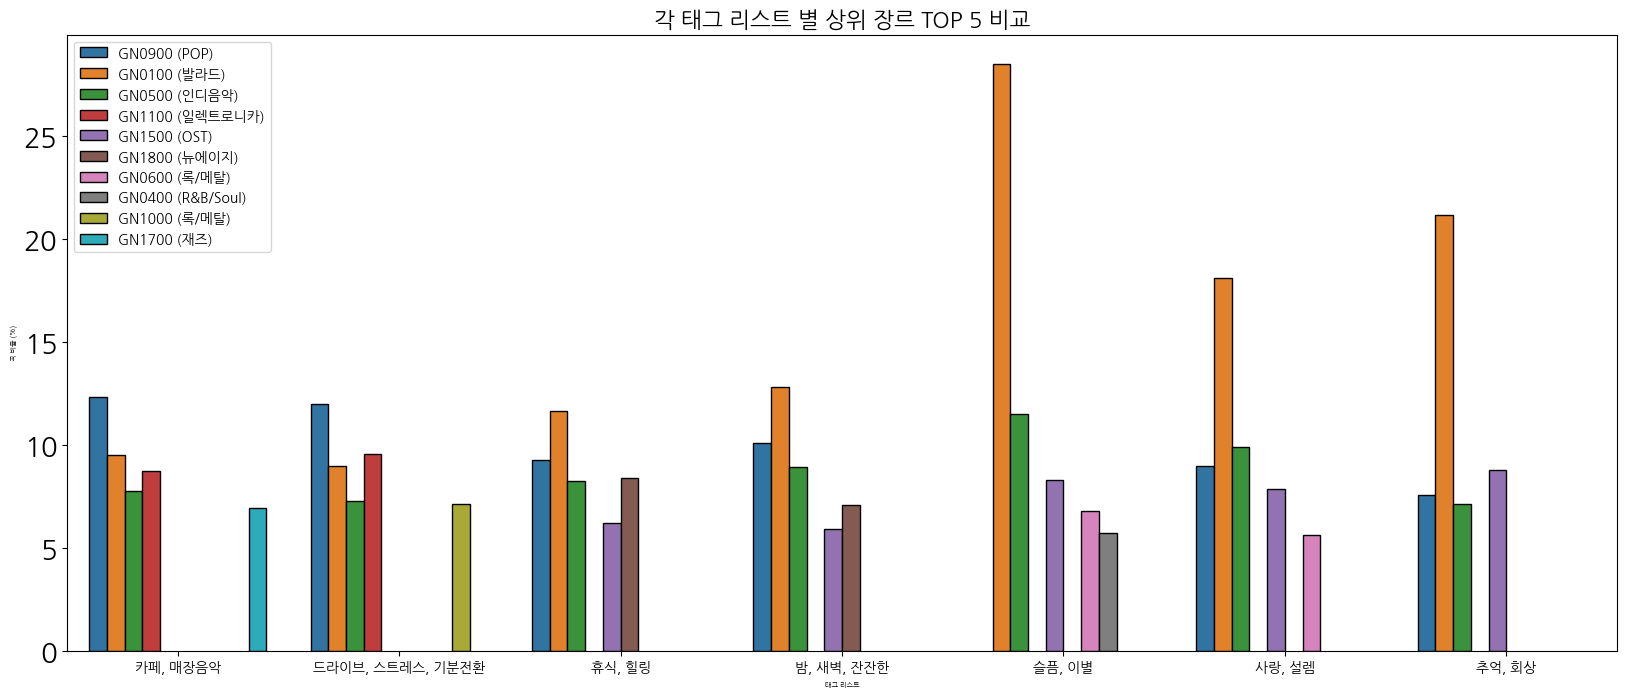

In [46]:
# 각 샘플 태그 리스트 별 장르 비율 집계
song_tag_map_sample_1_gnr_rank = song_tag_map_sample_1.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_1_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_1_gnr_rank['song_cnt']/sum(song_tag_map_sample_1_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_1_gnr_rank['gnr_rank'] = song_tag_map_sample_1_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_1_gnr_rank['tag_list'] = '드라이브, 스트레스, 기분전환'
song_tag_map_sample_1_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_2_gnr_rank = song_tag_map_sample_2.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_2_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_2_gnr_rank['song_cnt']/sum(song_tag_map_sample_2_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_2_gnr_rank['gnr_rank'] = song_tag_map_sample_2_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_2_gnr_rank['tag_list'] = '밤, 새벽, 잔잔한'
song_tag_map_sample_2_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_3_gnr_rank = song_tag_map_sample_3.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_3_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_3_gnr_rank['song_cnt']/sum(song_tag_map_sample_3_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_3_gnr_rank['gnr_rank'] = song_tag_map_sample_3_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_3_gnr_rank['tag_list'] = '사랑, 설렘'
song_tag_map_sample_3_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_4_gnr_rank = song_tag_map_sample_4.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_4_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_4_gnr_rank['song_cnt']/sum(song_tag_map_sample_4_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_4_gnr_rank['gnr_rank'] = song_tag_map_sample_4_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_4_gnr_rank['tag_list'] = '추억, 회상'
song_tag_map_sample_4_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_5_gnr_rank = song_tag_map_sample_5.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_5_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_5_gnr_rank['song_cnt']/sum(song_tag_map_sample_5_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_5_gnr_rank['gnr_rank'] = song_tag_map_sample_5_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_5_gnr_rank['tag_list'] = '슬픔, 이별'
song_tag_map_sample_5_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_6_gnr_rank = song_tag_map_sample_6.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_6_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_6_gnr_rank['song_cnt']/sum(song_tag_map_sample_6_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_6_gnr_rank['gnr_rank'] = song_tag_map_sample_6_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_6_gnr_rank['tag_list'] = '휴식, 힐링'
song_tag_map_sample_6_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

song_tag_map_sample_7_gnr_rank = song_tag_map_sample_7.groupby('gnr_code_name').songs.nunique().reset_index(name = 'song_cnt')
song_tag_map_sample_7_gnr_rank.loc[:, 'song_cnt_ratio'] = round(song_tag_map_sample_7_gnr_rank['song_cnt']/sum(song_tag_map_sample_7_gnr_rank['song_cnt'])*100, 2)
song_tag_map_sample_7_gnr_rank['gnr_rank'] = song_tag_map_sample_7_gnr_rank['song_cnt_ratio'].rank(ascending = False)
song_tag_map_sample_7_gnr_rank['tag_list'] = '카페, 매장음악'
song_tag_map_sample_7_gnr_rank.rename(columns = {'gnr_code_name' : '장르', 'song_cnt' : '곡 수', 'song_cnt_ratio' : '비율(%)', 'gnr_rank' : '순위', 'tag_list' : '태그 리스트'}, inplace = True)

# delete object
del song_tag_map_sample_1, song_tag_map_sample_2, song_tag_map_sample_3, song_tag_map_sample_4, song_tag_map_sample_5, song_tag_map_sample_6, song_tag_map_sample_7

# row binding
song_tag_map_sample_rbind = pd.concat(
    [song_tag_map_sample_1_gnr_rank, song_tag_map_sample_2_gnr_rank, song_tag_map_sample_3_gnr_rank,
     song_tag_map_sample_4_gnr_rank, song_tag_map_sample_5_gnr_rank, song_tag_map_sample_6_gnr_rank,
     song_tag_map_sample_7_gnr_rank],
    axis = 0
)

# plotting

plt.figure(figsize=(20, 8))

song_tag_map_sample_rbind_plot = sns.barplot(
    data = song_tag_map_sample_rbind.loc[song_tag_map_sample_rbind['순위'] <= 5, :].sort_values(by = '순위'),
    x = '태그 리스트', y = '비율(%)', hue = '장르', edgecolor = "black"
)
song_tag_map_sample_rbind_plot.set_title('각 태그 리스트 별 상위 장르 TOP 5 비교', fontsize=16)
song_tag_map_sample_rbind_plot.set_xlabel('태그 리스트', fontsize=5)
song_tag_map_sample_rbind_plot.set_ylabel('곡 비율 (%)', fontsize=5)
song_tag_map_sample_rbind_plot.legend(fontsize=10) 

plt.xticks(fontsize=10)
plt.show()

### step2. 태그 

In [47]:
playlists_songs = playlists.explode('songs') # song 기준으로 분해
song_meta_gnr = song_meta.explode('song_gn_gnr_basket') # 대분류 장르 기준으로 분해
ply_tag_song_gnr = pd.merge(playlists_songs, song_meta_gnr, how='left', left_on='songs', right_on='id') # 플레이리스트에 사용된 song 각각에 대분류 장르 달아주기
ply_tag_song_gnr = ply_tag_song_gnr.explode('tags') # 태그 기준으로 분해

ply_tag_gnr = ply_tag_song_gnr[['tags', 'song_gn_gnr_basket']] # 필요한 부분만 남기기

In [48]:
ply_tag_gnr.drop_duplicates(inplace=True) # 중복 행 제거

big_gnr_code = gnr_code_tree[['gnr_code', 'gnr_name']].drop_duplicates() # 대분류 장르코드, 장르 이름 가져오기

C:\Users\cg063\AppData\Local\Temp\ipykernel_4088\3607737618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ply_tag_gnr.drop_duplicates(inplace=True) # 중복 행 제거


In [49]:
ply_tag_gnr = pd.merge(ply_tag_gnr, big_gnr_code, how='left', left_on='song_gn_gnr_basket', right_on='gnr_code') # 대분류 코드 장르 기준으로 join해서 장르 이름 달아주기
ply_tag_gnr = ply_tag_gnr[['tags', 'gnr_code', 'gnr_name']] # 필요한 부분만 남기기
ply_tag_gnr

,tags,gnr_code,gnr_name
0,락,GN1400,포크/블루스/컨트리
1,락,GN0900,POP
2,락,GN1000,록/메탈
3,락,GN1300,R&B/Soul
4,락,GN1900,J-POP
...,...,...,...
264515,부들부들,GN0400,R&B/Soul
264516,extreme,GN1100,일렉트로니카
264517,담시,GN1500,OST
264518,퇴근버스,GN1200,랩/힙합


In [50]:
ply_tag_gnr_code_lst = ply_tag_gnr.groupby('tags')['gnr_code'].apply(list).reset_index() # 태그별 사용된 장르코드 list로 모아놓기
ply_tag_gnr_name_lst = ply_tag_gnr.groupby('tags')['gnr_name'].apply(list).reset_index() # 태그별 사용된 장르이름 list로 모아놓기
ply_tag_gnr_lst = pd.merge(ply_tag_gnr_code_lst, ply_tag_gnr_name_lst, on='tags')
ply_tag_gnr_lst

,tags,gnr_code,gnr_name
0,,"[GN1200, GN1300]","[랩/힙합, R&B/Soul]"
1,00,"[GN0900, GN1300, GN1200, GN2700, GN1100, GN150...","[POP, R&B/Soul, 랩/힙합, EDM, 일렉트로니카, OST, 록/메탈, ..."
2,007,"[GN0900, GN1500, GN1000, GN1300, GN2000, GN1700]","[POP, OST, 록/메탈, R&B/Soul, 월드뮤직, 재즈]"
3,007시리즈,"[GN0900, GN1500, GN1000, GN1300]","[POP, OST, 록/메탈, R&B/Soul]"
4,00s,"[GN0100, GN1500, GN0300, GN0400, GN0600, GN260...","[발라드, OST, 랩/힙합, R&B/Soul, 록/메탈, 일렉트로니카, 아이돌, ..."
...,...,...,...
29155,힙해,"[GN0400, GN2600, GN0500, GN0300, GN2500, GN020...","[R&B/Soul, 일렉트로니카, 인디음악, 랩/힙합, 아이돌, 댄스, 록/메탈, ..."
29156,힙힙힙,"[GN1100, GN0500, GN0400, GN0900, GN2500, GN030...","[일렉트로니카, 인디음악, R&B/Soul, POP, 아이돌, 랩/힙합, 일렉트로니..."
29157,힛뎀포크,"[GN1200, GN1300, GN1500]","[랩/힙합, R&B/Soul, OST]"
29158,힛뎀폭,"[GN1200, GN1300, GN1500]","[랩/힙합, R&B/Soul, OST]"


=> 플레이리스트 수록곡의 장르를 통해 태그 별 어떤 장르와 매핑되었는지 확인 할 수 있음

> genre_all

- 대분류 코드 중 일부 중복 :R&B/Soul(GN0400, GN1300), 록/메탈(GN0600, GN1000)  
- 대분류 코드 중 크리스마스(GN3000)는 소분류 코드 X

> song_meta

- 2020년 4월 경 제공된 data set인데, issue_date(발매일자)가 그 이후인 데이터가 있음 -> 오류 날짜 수정해야함
- genre_all에 없는 대분류 장르 존재 - GN9000 삭제 (태교, 노년 건강, 종교 관련 크리스마스 노래 등)

> playlists

- 가장 오래된 노래 : 19750201, 가장 최신 노래 : 20220113(날짜 오류)
- 전체의 2.09%는 같은 플레이리스트 타이틀을 갖고 있음
- 플레이리스트와 태그는 특수문자와 같은 불용어 포함하고 있음
- 정상 범주 내 속해 있는 플레이리스트 별 곡 수가 5~106개 갖고 있는 플레이리스트만 사용
- 노래 별 사용 빈도, 태그 별 사용 빈도를 확인해 적게 사용된 곡과 태그는 제외 -> 제외 시 노래 리스트, 태그 리스트가 비어있다면 플레이리스트 삭제
- 태그 별 어떤 장르의 노래를 설명했는지 확인
    - [카페, 매장음악], [드라이브, 스트레스, 기분전환]은 pop, [휴식, 힐링], [밤, 새벽, 잔잔한], [슬픔, 이별], [사랑, 설렘], [추억, 회상]은 발라드가 가장 많이 쓰임
    - 태그 별 어떤 장르에 사용 됐는지 확인
- 플레이리스트 별 좋아요 편차가 매우 심함

> 전처리 진행 방향

1. 타이틀, 태그 불용어 처리
2. 타이틀 중복된 플레이리스트 제거
3. 플리별 노래 개수, 좋아요 수 이상치 행 날리기 (태그는 보고 진행)
4. 송, 태그 빈도수에 따라 리스트에서 빼기 -> 리스트가 비워져 있으면 행 날리기

---